In [1]:
#pip install datapackage

In [2]:
import csv
import requests
import pandas as pd 
import io
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import time
import datapackage
import sklearn.linear_model as lm

## Etherium example

In [3]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
eth = pd.read_csv(io.StringIO(download.decode('utf-8')))

eth

,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,2021-07-22,1995.50,2024.47,1981.04,2012.23,1995.50,2024.47,1981.04,2012.23,5.824130e+04,5.824130e+04
1,2021-07-21,1786.03,2035.23,1747.55,1995.50,1786.03,2035.23,1747.55,1995.50,1.115950e+06,1.115950e+06
2,2021-07-20,1818.73,1841.34,1706.00,1786.03,1818.73,1841.34,1706.00,1786.03,7.862573e+05,7.862573e+05
3,2021-07-19,1891.65,1919.00,1805.00,1818.73,1891.65,1919.00,1805.00,1818.73,5.474199e+05,5.474199e+05
4,2021-07-18,1899.50,1993.79,1877.10,1891.64,1899.50,1993.79,1877.10,1891.64,5.348376e+05,5.348376e+05
...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-31,197.24,201.45,193.01,198.73,197.24,201.45,193.01,198.73,1.147397e+05,1.147397e+05
996,2018-10-30,196.95,198.60,195.91,197.27,196.95,198.60,195.91,197.27,8.363381e+04,8.363381e+04
997,2018-10-29,204.99,205.49,195.28,196.96,204.99,205.49,195.28,196.96,1.182818e+05,1.182818e+05
998,2018-10-28,204.45,205.94,203.62,204.99,204.45,205.94,203.62,204.99,4.439483e+04,4.439483e+04


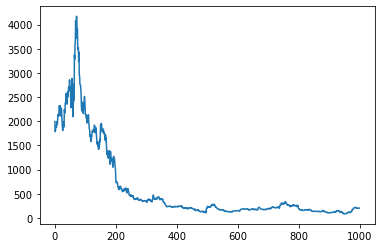

In [129]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
eth = eth.iloc[::-1]
ax.plot('open (USD)', data=eth.iloc[::-1])

plt.show()

## Bitcoin example

In [5]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=btc&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
btc = pd.read_csv(io.StringIO(download.decode('utf-8')))


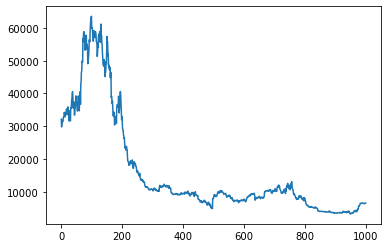

In [6]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot('open (USD)', data=btc)

plt.show()

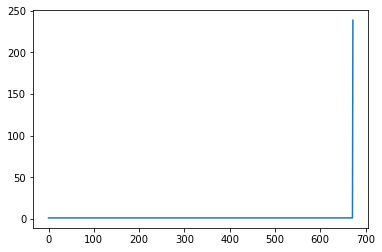

In [147]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=busd&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
busd = pd.read_csv(io.StringIO(download.decode('utf-8')))

fig, ax = plt.subplots()
ax.plot('open (USD)', data=busd)

plt.show()

# Get all courencies that are available (not all return values, some throw errors)

In [7]:
# https://www.alphavantage.co/documentation/#currency-daily
#https://www.alphavantage.co/documentation/#crypto-exchange
# https://www.alphavantage.co/digital_currency_list/
digital_currency_list = 'digital_currency_list.csv'
currencies = pd.read_csv(digital_currency_list) 
currencies.head()

,currency code,currency name
0,1ST,FirstBlood
1,2GIVE,GiveCoin
2,808,808Coin
3,AAVE,Aave
4,ABT,ArcBlock


In [8]:
path = 'cy_data'
pathToSave = 'diagrams/{}.png'
dir_list = sorted(os.listdir(path))
data  = list() # a list of dataframes containing all data from all cryp

## API Requests

In [9]:
# https://www.alphavantage.co/documentation/#currency-daily
#data  = list() # a list of dataframes containing all data from all cryp
#i = 1
start_time = time.time()
for c in currencies['currency code']: 
    #print(c)
    #if i%6 == 0: # only 5 api calls per minute
    #    print('Waiting')
    #    time.sleep(65)
    
    CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={}&datatype=csv&market=USD&outputsize=full&apikey=E7BF5XXE8WRMMDOD'.format(c)
    download = requests.Session().get(CSV_URL).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    df.to_csv('cy_data/{}.csv'.format(c), encoding='utf-8')
    #print(df.head())
    #data.append(df)
    #i += 1

print("--- %s seconds ---" % (time.time() - start_time))  
    


--- 349.136168718338 seconds ---


In [10]:
data, currencies_list, errors, notes, shit = list(), list(), list(), list(), list()
for d in dir_list: 
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    df = pd.read_csv('{}/{}'.format(path, d))
    #print(d)
    if df.size == 0:
        print('Empty: {}'.format(d))
    elif '20' in df.iat[0, 1]:
        data.append(df)
        currencies_list.append(d.split(".")[0])
        #print('Yeah data')
    elif 'Error' in df.iat[0, 1]:
        errors.append(d.split(".")[0])
    elif 'Note' in df.iat[0, 1]:
        notes.append(d.split(".")[0])
    else:
        print('Crazy shit is happening with {}'.format(d))
        shit.append(df)
        
data[0].head()
print('--------Number of data: {}'.format(len(data)))   
#data[0].head()
print('--------Number of errors: {}'.format(len(errors)))  
#print(errors)
print('--------Number of notes: {}'.format(len(notes)))  
#print(notes)
print('--------Number of shit: {}'.format(len(shit)))  
#print(shit)

Empty: .~lock.ADA.csv#
--------Number of data: 105
--------Number of errors: 466
--------Number of notes: 0
--------Number of shit: 0


Rerun the following as long as there are still notes 

In [11]:
# https://www.alphavantage.co/documentation/#currency-daily
#data  = list() # a list of dataframes containing all data from all cryp
i = 1
for c in notes: 
    print(c)
    
    #if i%6 == 0: # only 5 api calls per minute
    #    print('Waiting')
    #    time.sleep(65)
    
    CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={}&datatype=csv&market=USD&outputsize=full&apikey=E7BF5XXE8WRMMDOD'.format(c)
    
    download = requests.Session().get(CSV_URL).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    print(df.head())
    df.to_csv('cy_data/{}.csv'.format(c), encoding='utf-8')
    #data.append(df)
    #i += 1
    


In [12]:
data[0]

,Unnamed: 0,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,0,2021-07-22,259.450,264.800,256.670,262.610,259.450,264.800,256.670,262.610,10563.9520,10563.9520
1,1,2021-07-21,223.390,263.480,216.990,259.450,223.390,263.480,216.990,259.450,247998.9693,247998.9693
2,2,2021-07-20,238.450,242.410,212.540,223.030,238.450,242.410,212.540,223.030,191015.8602,191015.8602
3,3,2021-07-19,253.880,255.990,232.930,238.510,253.880,255.990,232.930,238.510,147774.6078,147774.6078
4,4,2021-07-18,253.140,267.960,250.690,253.680,253.140,267.960,250.690,253.680,107331.6064,107331.6064
...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,2020-10-19,40.820,41.000,35.912,35.980,40.820,41.000,35.912,35.980,86475.9360,86475.9360
277,277,2020-10-18,41.359,41.425,39.428,40.750,41.359,41.425,39.428,40.750,30917.9530,30917.9530
278,278,2020-10-17,39.371,43.235,38.206,41.365,39.371,43.235,38.206,41.365,41971.1430,41971.1430
279,279,2020-10-16,43.017,43.800,39.092,39.461,43.017,43.800,39.092,39.461,90836.4120,90836.4120


In [13]:
rel_data = data.copy() 
for d in rel_data: 
    start = d.iat[0, 2]
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    d['open (USD)'] /= start
    d['high (USD)'] /= start
    d['low (USD)'] /= start
    d['close (USD)'] /= start
    d['spread'] = d['high (USD)'] - d['low (USD)']
rel_data[0]

,Unnamed: 0,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD),spread
0,0,2021-07-22,1.000000,1.020621,0.989285,1.012180,259.450,264.800,256.670,262.610,10563.9520,10563.9520,0.031336
1,1,2021-07-21,0.861014,1.015533,0.836346,1.000000,223.390,263.480,216.990,259.450,247998.9693,247998.9693,0.179187
2,2,2021-07-20,0.919060,0.934323,0.819194,0.859626,238.450,242.410,212.540,223.030,191015.8602,191015.8602,0.115128
3,3,2021-07-19,0.978532,0.986664,0.897784,0.919291,253.880,255.990,232.930,238.510,147774.6078,147774.6078,0.088880
4,4,2021-07-18,0.975679,1.032800,0.966236,0.977761,253.140,267.960,250.690,253.680,107331.6064,107331.6064,0.066564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,2020-10-19,0.157333,0.158027,0.138416,0.138678,40.820,41.000,35.912,35.980,86475.9360,86475.9360,0.019611
277,277,2020-10-18,0.159410,0.159665,0.151968,0.157063,41.359,41.425,39.428,40.750,30917.9530,30917.9530,0.007697
278,278,2020-10-17,0.151748,0.166641,0.147258,0.159433,39.371,43.235,38.206,41.365,41971.1430,41971.1430,0.019383
279,279,2020-10-16,0.165801,0.168819,0.150673,0.152095,43.017,43.800,39.092,39.461,90836.4120,90836.4120,0.018146


In [14]:
ouput_df = pd.DataFrame(data=currencies_list)
ouput_df.columns =['currency']

In [15]:
def time_corr(a, b, timestamp_b='timestamp', open_b='open (USD)'):

    # get the time frame where data for both dfs 
    mi = max(a['timestamp'].min(), b[timestamp_b].min())
    ma = min(a['timestamp'].max(), b[timestamp_b].max())

    # get the data from the time frame where there is data of both dataframes
    a_start = a.index[a['timestamp'] == ma].tolist()
    a_end = a.index[a['timestamp'] == mi].tolist()
    b_start = b.index[b[timestamp_b] == ma].tolist()
    b_end = b.index[b[timestamp_b] == mi].tolist()
    
    if(a_start and b_start and a_end and b_end):
        a_use = a.iloc[a_start[0]: a_end[0], :]
        b_use = b.iloc[b_start[0]: b_end[0], :]

        return a_use['open (USD)'].corr(b_use[open_b])
    else:
        return 0

In [16]:
sp500 = pd.read_csv('HistoricalData_SP500_2.csv')
print(sp500)
for idx, d in enumerate(sp500['Date']):
        tmp = d.split('-')
        sp500['Date'][idx] = tmp[2] + '-' + tmp[0] + '-' + tmp[1]
print(sp500)

           Date  Close-Last Volume     Open     High      Low
0    07-20-2021     4323.06     --  4265.11  4336.84  4262.05
1    07-19-2021     4258.49     --  4296.40  4296.40  4233.13
2    07-16-2021     4327.16     --  4367.43  4375.09  4322.53
3    07-15-2021     4360.03     --  4369.02  4369.02  4340.70
4    07-14-2021     4374.30     --  4380.11  4393.68  4362.36
..          ...         ...    ...      ...      ...      ...
682  10-31-2018     2711.74     --  2705.60  2736.69  2705.60
683  10-30-2018     2682.63     --  2640.68  2685.43  2635.34
684  10-29-2018     2641.25     --  2682.65  2706.85  2603.54
685  10-26-2018     2658.69     --  2667.86  2692.38  2628.16
686  10-25-2018     2705.57     --  2674.88  2722.70  2667.84

[687 rows x 6 columns]
           Date  Close-Last Volume     Open     High      Low
0    2021-07-20     4323.06     --  4265.11  4336.84  4262.05
1    2021-07-19     4258.49     --  4296.40  4296.40  4233.13
2    2021-07-16     4327.16     --  4367.43  4

<ipython-input-16-5ad2c09e4abe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Date'][idx] = tmp[2] + '-' + tmp[0] + '-' + tmp[1]


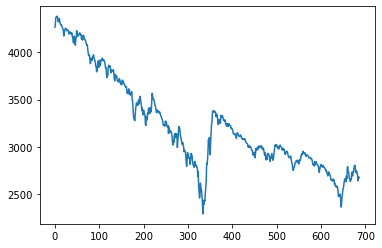

In [17]:
fig, ax = plt.subplots()
ax.plot('Open', data=sp500)
#ax.plot('Open', data=sp500.tail(1000))
plt.show()

In [78]:
l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11 = list(),  list(), list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
corr_btc_cur, corr_btc_df = list(),list()
corr_sp500_cur, corr_sp500_df = list(),list()
x = 2
for cnt, d in enumerate(rel_data): 
    l0.append(d['market cap (USD)'].mean())
    l1.append(d.count(axis=0)[1])
    l2.append(d['open (USD)'].std())
    l3.append(d['open (USD)'].mean())
    
    std = d['spread'].std()
    mu = d['spread'].mean()
    l4.append(std)
    l5.append(mu)
    ss = 0
    for e in d['spread']:
        if (e > mu + x*std) or (e < mu - x*std):
            ss += 1
    l6.append(ss)
    l7.append(d.iat[0, 3] - d.iat[-1, 3])
    l8.append((d.iat[0, 3] - d.iat[-1, 3]) / d.count(axis=0)[1])
    c = time_corr(d, rel_data[currencies_list.index('BTC')])
    l9.append(c)
    if c < -0.5:
        corr_btc_cur.append(ouput_df.iloc[cnt, 0])
        corr_btc_df.append(d)
    
    c = time_corr(d, sp500, timestamp_b='Date', open_b='Open')
    l10.append(c)
    if c < -0.5:
        corr_sp500_cur.append(ouput_df.iloc[cnt, 0])
        corr_sp500_df.append(d)
    l11 = d['timestamp'][0]
    
ouput_df['avg market cap'] = l0    
ouput_df['observations'] = l1
ouput_df['std'] = l2
ouput_df['mean'] = l3
ouput_df['spread std'] = l4
ouput_df['spread mean'] = l5
ouput_df['outlier (3std)'] = l6
ouput_df['profit'] = l7
ouput_df['avg profit per day'] = l8
ouput_df['corr to BTC'] = l9
ouput_df['corr to S&P500'] = l10
ouput_df['last timestamp'] = l11

ouput_df

,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
0,AAVE,2.865326e+05,281,0.600026,1.015336,0.135120,0.144640,13,0.793216,0.002823,0.864717,-0.052914,2021-07-22
1,ADA,3.317066e+08,1000,0.407515,0.243991,0.064980,0.027816,48,0.958953,0.000959,0.879853,0.000000,2021-07-22
2,AION,1.915401e+07,520,0.893351,1.299996,0.269136,0.202843,27,-1.253308,-0.002410,0.761753,0.513203,2021-07-22
3,ALGO,2.336447e+07,762,0.530713,0.697014,0.127183,0.091648,23,-3.448715,-0.004526,0.819493,0.000000,2021-07-22
4,ANT,1.066833e+06,344,0.737817,1.563257,0.652019,0.259721,2,-12.095321,-0.035161,0.658343,0.220898,2021-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,XZC,1.243922e+05,294,0.246341,1.022063,0.108304,0.103729,9,-0.349436,-0.001189,0.839770,0.556759,2021-07-22
101,ZEC,2.001216e+05,855,0.543846,0.830596,0.123412,0.087524,31,0.386514,0.000452,0.850143,0.730657,2021-07-22
102,ZEN,2.300921e+05,382,0.782440,0.810260,0.165131,0.125770,24,0.874311,0.002289,0.791639,0.762846,2021-07-22
103,ZIL,2.467965e+08,885,0.918458,0.684451,0.171883,0.095302,45,0.689985,0.000780,0.959159,0.785530,2021-07-22


In [79]:
print('min obersations: {}'.format(ouput_df['observations'].min()))
print('max obersations: {}'.format(ouput_df['observations'].max()))

ouput_sorted = ouput_df.sort_values(['avg market cap', 'currency'], ascending=False)
ouput_sorted.head(10)

min obersations: 18
max obersations: 1000


,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
19,BTT,1.946660e+10,904,0.806825,0.536847,0.185340,0.074392,38,0.727358,0.000805,0.744274,0.688297,2021-07-22
69,NPXS,3.972223e+09,602,0.176529,0.072023,0.040501,0.012012,24,0.960244,0.001595,-0.103441,0.498106,2021-07-22
29,DENT,3.629096e+09,696,1.700348,0.807889,0.423276,0.160474,37,0.670500,0.000963,0.767398,0.572412,2021-07-22
32,DOGE,2.509966e+09,749,0.605600,0.265957,0.162520,0.050741,30,1.007404,0.001345,0.638779,0.747217,2021-07-22
90,VET,1.412235e+09,1000,0.661518,0.379231,0.141930,0.055437,40,0.849054,0.000849,0.832340,0.000000,2021-07-22
85,TRX,1.302617e+09,1000,0.484858,0.581799,0.091846,0.057461,45,0.559844,0.000560,0.836774,0.000000,2021-07-22
47,IOST,9.179381e+08,854,0.791273,0.708527,0.175567,0.097012,39,-0.463320,-0.000543,0.901989,0.722709,2021-07-22
77,SC,8.084490e+08,382,1.026796,1.026672,0.248763,0.161501,18,0.706419,0.001849,0.812175,0.563352,2021-07-22
61,MATIC,4.801401e+08,819,0.451258,0.196347,0.121786,0.036061,27,1.034449,0.001263,0.572532,0.786911,2021-07-22
97,XRP,3.891248e+08,1000,0.476582,0.674376,0.114870,0.069041,47,0.193774,0.000194,0.726475,0.000000,2021-07-22


Text(0, 0.5, 'Profit')

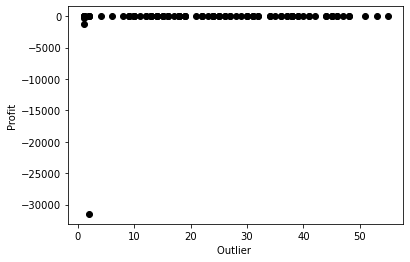

In [80]:
plt.scatter(ouput_df['outlier (3std)'], ouput_df['profit'], color='k')
plt.xlabel('Outlier ')
plt.ylabel('Profit')

In [100]:
print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df.drop(ouput_df['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print(currencies.loc[currencies['currency code'] == currencies_list[ouput_df_wo_ol['profit'].idxmin()]])
ouput_df_wo_ol = ouput_df_wo_ol.drop(ouput_df_wo_ol['profit'].idxmin(), axis=0)

print('average profit: {}'.format(ouput_df_wo_ol['profit'].mean()))

    currency code currency name
501           VEN       VeChain
    currency code currency name
288           MCO        Monaco
   currency code currency name
95          BUSD   Binance-USD
   currency code currency name
26           ANT        Aragon
    currency code currency name
193           FIL      Filecoin
average profit: 0.042228417099701654


Coefficients: 
 [[0.02569079]]


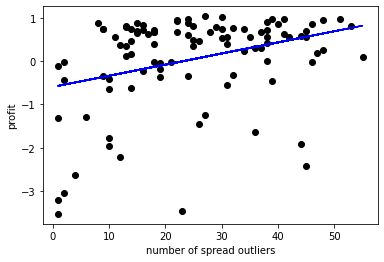

In [101]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['outlier (3std)'].values.reshape(-1, 1)
y = ouput_df_wo_ol['profit'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('number of spread outliers')
plt.ylabel('profit')
plt.savefig(pathToSave.format('outlier_profit'))
plt.show()


Coefficients: 
 [[0.00034882]]


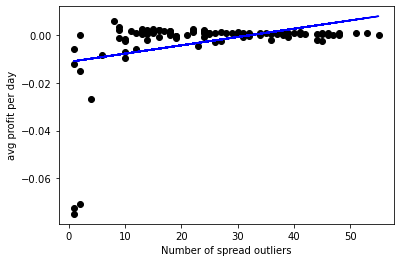

In [102]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['outlier (3std)'].values.reshape(-1, 1)
y = ouput_df_wo_ol['avg profit per day'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('Number of spread outliers')
plt.ylabel('avg profit per day')
plt.savefig(pathToSave.format('outlier_profit_per_day'))
plt.show()


Coefficients: 
 [[-1.39001167e-11]]


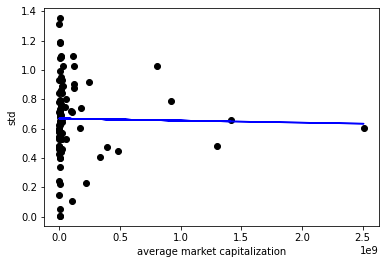

In [134]:
ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_ol['avg market cap'].idxmax(), axis=0)
ouput_df_wo_olx = ouput_df_wo_olx.drop(ouput_df_wo_olx['avg market cap'].idxmax(), axis=0)
ouput_df_wo_olx = ouput_df_wo_olx.drop(ouput_df_wo_olx['avg market cap'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#ouput_df_wo_olx = ouput_df_wo_ol.drop(ouput_df_wo_olx['profit'].idxmax(), axis=0)
#plt.scatter(ouput_df_wo_olx['avg market cap'], ouput_df_wo_olx['std'], color='k')
#plt.scatter(ouput_df['avg market cap'], ouput_df['std'], color='k')
#plt.xlabel('Average market capitalisation')
#plt.ylabel('Profit')

#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_olx['avg market cap'].values.reshape(-1, 1)
y = ouput_df_wo_olx['std'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('average market capitalization')
plt.ylabel('std')
plt.savefig(pathToSave.format('std_market_cap'))
plt.show()

Text(0, 0.5, 'Profit')

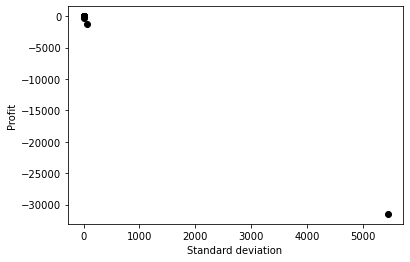

In [104]:
plt.scatter(ouput_df['std'], ouput_df['profit'], color='k')
plt.xlabel('Standard deviation ')
plt.ylabel('Profit')

Coefficients: 
 [[-0.03422249]]


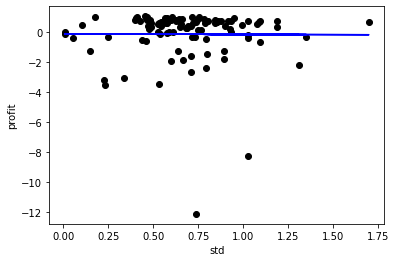

In [86]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['std'].values.reshape(-1, 1)
y = ouput_df_wo_ol['profit'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('std')
plt.ylabel('profit')
plt.savefig(pathToSave.format('std_profit'))
plt.show()

Coefficients: 
 [[0.01185592]]


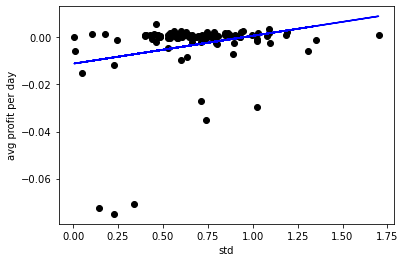

In [87]:
#data = pd.read_csv('data.csv')  # load data set
x = ouput_df_wo_ol['std'].values.reshape(-1, 1)
y = ouput_df_wo_ol['avg profit per day'].values.reshape(-1, 1)

linear_regressor = lm.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

print('Coefficients: \n', linear_regressor.coef_)
plt.scatter(x, y, color='k')
plt.plot(x, y_pred, color='b')
plt.xlabel('std')
plt.ylabel('avg profit per day')
plt.savefig(pathToSave.format('std_profit_per_day'))
plt.show()

Text(0, 0.5, 'Profit')

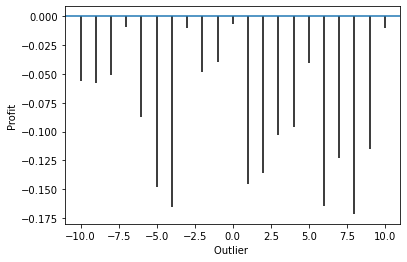

In [88]:
plt.xcorr(ouput_df['outlier (3std)'], ouput_df['profit'])
plt.xlabel('Outlier ')
plt.ylabel('Profit')

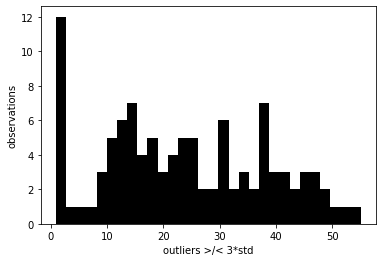

In [89]:
plt.hist(ouput_df['outlier (3std)'], bins=30, color='k')
plt.xlabel('outliers >/< 3*std')
plt.ylabel('observations')
plt.savefig(pathToSave.format('hist_outlier'))
plt.show()

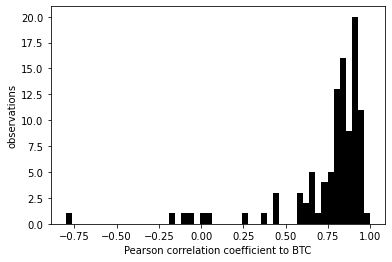

In [90]:
plt.hist(ouput_df['corr to BTC'],bins=50, color='k')
plt.xlabel('Pearson correlation coefficient to BTC')
plt.ylabel('observations')
plt.savefig(pathToSave.format('hist_corr_BTC'))
plt.show()

In [91]:
print(corr_btc_cur)
ouput_df.loc[ouput_df['currency'] == corr_btc_cur[0]]

['STRAT']


,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
82,STRAT,738964.286493,268,0.225078,0.787482,0.212159,0.092489,1,-3.192708,-0.011913,-0.800988,-0.423284,2021-07-22


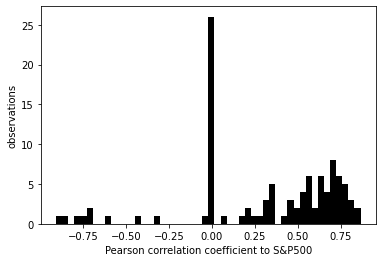

In [92]:
plt.hist(ouput_df['corr to S&P500'],bins=50, color='k') 
plt.xlabel('Pearson correlation coefficient to S&P500')
plt.ylabel('observations')
#plt.savefig(pathToSave.format('hist_corr_SP500'))
plt.show()

In [93]:
print(corr_sp500_cur)
ouput_df.loc[ouput_df['currency'].isin(corr_sp500_cur)]

['BTG', 'CAKE', 'DNT', 'GRT', 'GTC', 'KLAY', 'XEM']


,currency,avg market cap,observations,std,mean,spread std,spread mean,outlier (3std),profit,avg profit per day,corr to BTC,corr to S&P500,last timestamp
17,BTG,1.022578e+05,98,0.712021,1.797726,0.323998,0.322055,4,-2.636120,-0.026899,0.931654,-0.701691,2021-07-22
21,CAKE,6.821913e+06,154,0.636378,1.448754,0.184919,0.233249,6,-1.298725,-0.008433,0.386449,-0.711942,2021-07-22
31,DNT,3.182772e+07,255,0.892522,1.593352,0.298474,0.279954,10,-1.778281,-0.006974,0.951982,-0.591473,2021-07-22
42,GRT,1.151724e+08,218,1.092333,1.971283,0.268294,0.314956,9,0.742109,0.003404,0.896759,-0.908586,2021-07-22
43,GTC,1.574107e+06,43,0.337199,1.239732,0.380752,0.259440,2,-3.040678,-0.070713,0.829560,-0.737756,2021-07-22
50,KLAY,3.501540e+06,29,0.051886,1.022468,0.104063,0.104821,2,-0.435599,-0.015021,0.916261,-0.792165,2021-07-22
94,XEM,1.228375e+08,241,1.025003,2.088381,0.302527,0.308523,10,-0.415285,-0.001723,0.644691,-0.857075,2021-07-22


In [94]:
used_currencies = currencies.loc[currencies['currency code'].isin(currencies_list)]
used_currencies.to_csv('{}.csv'.format('used_currencies'), encoding='utf-8')
ouput_df.to_csv('{}.csv'.format('output'), encoding='utf-8')

In [95]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=GRT&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
grt = pd.read_csv(io.StringIO(download.decode('utf-8')))
grt

,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,2021-07-22,0.55760,0.56080,0.54460,0.55390,0.55760,0.56080,0.54460,0.55390,9.518271e+05,9.518271e+05
1,2021-07-21,0.49220,0.57660,0.47400,0.55750,0.49220,0.57660,0.47400,0.55750,3.064335e+07,3.064335e+07
2,2021-07-20,0.50760,0.51860,0.47550,0.49210,0.50760,0.51860,0.47550,0.49210,2.090642e+07,2.090642e+07
3,2021-07-19,0.55160,0.55720,0.50210,0.50750,0.55160,0.55720,0.50210,0.50750,2.051811e+07,2.051811e+07
4,2021-07-18,0.55890,0.58640,0.54870,0.55160,0.55890,0.58640,0.54870,0.55160,1.268063e+07,1.268063e+07
...,...,...,...,...,...,...,...,...,...,...,...
213,2020-12-21,0.73726,0.77200,0.45000,0.47195,0.73726,0.77200,0.45000,0.47195,9.070190e+08,9.070190e+08
214,2020-12-20,0.47735,0.78300,0.45000,0.73826,0.47735,0.78300,0.45000,0.73826,1.865776e+09,1.865776e+09
215,2020-12-19,0.26097,0.58990,0.25522,0.47749,0.26097,0.58990,0.25522,0.47749,2.419430e+09,2.419430e+09
216,2020-12-18,0.12253,0.28665,0.12253,0.26122,0.12253,0.28665,0.12253,0.26122,1.898015e+09,1.898015e+09


In [96]:
rel_sp500 = sp500.copy() 
print(sp500)
for d in rel_sp500: 
    start = d.iat[0, 3]
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    d['Open'] /= start
rel_data[0]

           Date  Close-Last Volume     Open     High      Low
0    2021-07-20     4323.06     --  4265.11  4336.84  4262.05
1    2021-07-19     4258.49     --  4296.40  4296.40  4233.13
2    2021-07-16     4327.16     --  4367.43  4375.09  4322.53
3    2021-07-15     4360.03     --  4369.02  4369.02  4340.70
4    2021-07-14     4374.30     --  4380.11  4393.68  4362.36
..          ...         ...    ...      ...      ...      ...
682  2018-10-31     2711.74     --  2705.60  2736.69  2705.60
683  2018-10-30     2682.63     --  2640.68  2685.43  2635.34
684  2018-10-29     2641.25     --  2682.65  2706.85  2603.54
685  2018-10-26     2658.69     --  2667.86  2692.38  2628.16
686  2018-10-25     2705.57     --  2674.88  2722.70  2667.84

[687 rows x 6 columns]


AttributeError: 'str' object has no attribute 'iat'

In [118]:
btc_strat = pd.read_csv('BTC_STRAT.csv') 
btc_strat.head()


,timestamp,STRAT,BTC
0,2020-11-12,0.5376,15684.25
1,2020-11-11,0.5389,15297.21
2,2020-11-10,0.5181,15328.41
3,2020-11-09,0.4937,15475.10
4,2020-11-08,0.4362,14818.30


In [119]:
ss = btc_strat['STRAT'][0]
btc_strat['STRAT'] /= ss

bs = btc_strat['BTC'][0]
btc_strat['BTC'] /= bs
btc_strat.head()

,timestamp,STRAT,BTC
0,2020-11-12,1.000000,1.000000
1,2020-11-11,1.002418,0.975323
2,2020-11-10,0.963728,0.977312
3,2020-11-09,0.918341,0.986665
4,2020-11-08,0.811384,0.944789


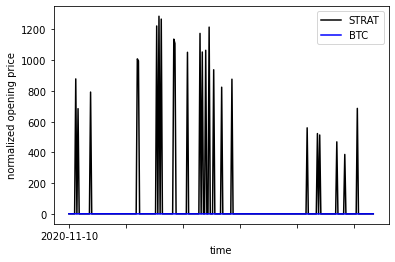

In [146]:
#btc_strat = btc_strat.iloc[::-1]
ax =  btc_strat.plot(color=['k','b'])
ax.set_xlabel("time")
#ax.set_xticklabels(['a', 'b'])
ax.set_xticklabels([btc_strat['timestamp'][0], btc_strat['timestamp'][2]])
ax.set_ylabel("normalized opening price")
ax.figure.savefig('diagrams/btc_stat.png')

